In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DataFields import DataFields
from DataFields import DateReportedFields
from ProjectFunctions import get_columns_from_chunk, convert_date_to_binary, drop_rows_with_na_greater_than
from ProjectFunctions import map_education_levels, map_vascular_levels

UKBB_PATH = "~/biobank/ukb672220.csv"

# A dictionary containing the used features
datafields = DataFields

# Features of conditions specified by date
datereportedfields = DateReportedFields

#### Measure the distribution of age

Counts [340 695 447 263  73  60  38  11   6   6]
Edges: [1937.  1939.8 1942.6 1945.4 1948.2 1951.  1953.8 1956.6 1959.4 1962.2
 1965. ]


,Birth Year,Sex,Education,Primary Hypertension,Secondary Hypertension,BMI Impedance,Smoking Status,Ever Smoked,Alcohol Intake Frequency,Report of stroke,...,Platelet distribution width,Red blood cell (erythrocyte) count,Red blood cell (erythrocyte) distribution width,Reticulocyte count,Reticulocyte percentage,White blood cell (leukocyte) count,Blood Pressure Diastolic,Blood Pressure Systolic,Pulse Rate at Blood Pressure,Has Vascular Dementia
count,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.00000,1939.000000,...,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.0
mean,1943.169159,0.591542,1.198614,0.789067,0.003094,28.538321,0.705046,0.675606,3.18559,0.311501,...,16.539562,4.488396,13.727148,0.064505,1.440548,7.347432,82.119968,147.113214,70.945597,1.0
std,4.233419,0.491675,1.121535,0.408076,0.055555,5.074911,0.676480,0.468269,1.70316,0.463226,...,0.534139,0.441748,1.098247,0.035512,0.810188,1.967500,10.740061,20.117205,12.722275,0.0
min,1937.000000,0.000000,0.000000,0.000000,0.000000,15.757600,0.000000,0.000000,1.00000,0.000000,...,15.200000,1.720000,11.490000,0.012000,0.263000,2.370000,47.000000,78.000000,35.000000,1.0
25%,1940.000000,0.000000,0.000000,1.000000,0.000000,25.070900,0.000000,0.000000,2.00000,0.000000,...,16.200000,4.200000,13.100000,0.046000,1.028000,6.040000,75.000000,133.087915,63.000000,1.0
50%,1942.000000,1.000000,1.000000,1.000000,0.000000,27.805800,1.000000,1.000000,3.00000,0.000000,...,16.500000,4.483000,13.530000,0.061000,1.340000,7.120000,82.000000,146.000000,70.000000,1.0
75%,1945.000000,1.000000,2.000000,1.000000,0.000000,31.367600,1.000000,1.000000,5.00000,1.000000,...,16.860000,4.769500,14.100000,0.078000,1.739000,8.440000,89.000000,159.000000,78.000000,1.0
max,1965.000000,1.000000,3.000000,1.000000,1.000000,54.528300,2.000000,1.000000,6.00000,1.000000,...,19.400000,6.390000,31.700000,1.077000,25.278000,34.130000,132.000000,241.000000,169.000000,1.0


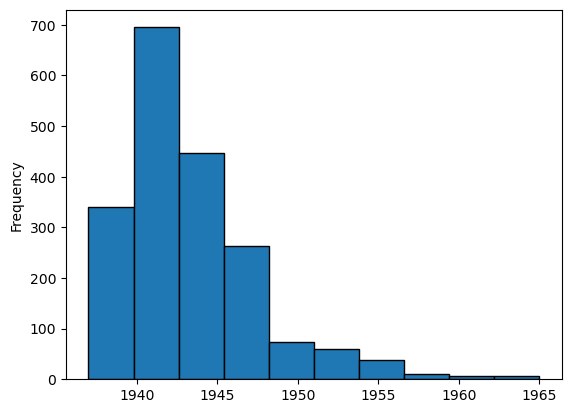

In [2]:
df = pd.read_csv("diagnosed_imputed.csv")

# plot histogram of the birth year
df["Birth Year"].plot(kind='hist', bins=10, edgecolor='black')
birth_year_counts_histogram, birth_year_histogram_edges = np.histogram(df["Birth Year"], bins=10)
print(f"Counts {birth_year_counts_histogram}")
print(f"Edges: {birth_year_histogram_edges}")
# describe the birth year
df.describe()

#### Extract samples of patients undiagnosed with vascular dementia with similar birth year

##### Define features to drop if na

In [4]:
drop_if_na_list = [
    "Smoking Status",
    "Education",
    "Ever Smoked",
    "Report of vascular problems",
    
    "Alanine aminotransferase",
    "Albumin",
    "Alkaline phosphatase",
    "Apolipoprotein A",
    "Apolipoprotein B",
    "Aspartate aminotransferase",
    "C-reactive protein",
    "Calcium",
    "Cholesterol",
    "Creatinine",
    "Cystatin C",
    "Direct bilirubin",
    "Gamma glutamyltransferase",
    "Glucose",
    "Glycated haemoglobin (HbA1c)",
    "HDL cholesterol",
    "IGF-1",
    "LDL direct",
    "Lipoprotein A",
    "Phosphate",
    "SHBG",
    "Testosterone",
    "Total bilirubin",
    "Total protein",
    "Triglycerides",
    "Urate",
    "Urea",
    "Vitamin D",
    
    "Basophil count",
    "Basophil percentage",
    "Eosinophil count",
    "Eosinophil percentage",
    "Haematocrit percentage",
    "Haemoglobin concentration",
    "High light scatter reticulocyte count",
    "High light scatter reticulocyte percentage",
    "Immature reticulocyte fraction",
    "Lymphocyte count",
    "Lymphocyte percentage",
    "Mean corpuscular haemoglobin",
    "Mean corpuscular haemoglobin concentration",
    "Mean corpuscular volume",
    "Mean platelet (thrombocyte) volume",
    "Mean reticulocyte volume",
    "Mean sphered cell volume",
    "Monocyte count",
    "Monocyte percentage",
    "Neutrophil count",
    "Neutrophil percentage",
    "Nucleated red blood cell count",
    "Nucleated red blood cell percentage",
    "Platelet count",
    "Platelet crit",
    "Platelet distribution width",
    "Red blood cell (erythrocyte) count",
    "Red blood cell (erythrocyte) distribution width",
    "Reticulocyte count",
    "Reticulocyte percentage",
    "White blood cell (leukocyte) count",
    "Blood Pressure Diastolic",
    "Blood Pressure Systolic",
    "Pulse Rate at Blood Pressure"
]

In [ ]:
# Sample "count" rows from dataframe following a condtion by chunks randomly.
def sample_by_condition(file_path, column, condition_function, count, samples_per_chunk, chunksize=10000):
    result = pd.DataFrame()
    samples_collected = 0

    for chunk in pd.read_csv(file_path, chunksize=chunksize, low_memory=False):
        # remove unnecessary columns first.
        chunk = get_columns_from_chunk(chunk, datafields, oldest=True)
        # filter by condition function
        mask = condition_function(chunk[column])
        filtered_chunk = chunk.loc[mask]
        # convert items with value less than 0 to NA
        filtered_chunk = filtered_chunk.mask(filtered_chunk.select_dtypes(include='number') < 0)
        # drop all NA
        filtered_chunk = filtered_chunk.dropna(subset=drop_if_na_list) # drop if missing value for some columns

        if filtered_chunk.empty:
            continue
    
        remaining_samples = count - samples_collected
        if remaining_samples <= 0:
            break
            
        # choose randomly from bucker if too many were collected
        k = min(samples_per_chunk, len(filtered_chunk))
        chunk_sample = filtered_chunk.sample(n=k)
    
        if result.empty:
            result = chunk_sample
        else:
            result = pd.concat([result, chunk_sample], ignore_index=True, copy=False)

        samples_collected += len(chunk_sample)

        if samples_collected >= count:
            break
            
    if samples_collected > count:
        return result.sample(n=count)
    else:
        return result

In [ ]:
per_chunk = 500 # maximum samples to take from a single chunk per histogram column
col_name = "Birth Year" # The column to use as a rule for "sample_by_condition"
vd_1 = "Vascular Dementia Date First Reported" # vd_1 and vd_2 used to drop diagnosed patients
vd_2 = "Date of vascular dementia report"

const = 20 # constant addition per histogram

undiagnosed_df = pd.DataFrame()

for i in range(len(birth_year_counts_histogram)):
    start, end = birth_year_histogram_edges[i], birth_year_histogram_edges[i+1]
    count = birth_year_counts_histogram[i]
    
    df = sample_by_condition(UKBB_PATH, col_name, lambda x:(x >= start) & (x < end), count + const, per_chunk)
    
    df = df[df[vd_1].isna() & df[vd_2].isna()] # drop if has vascular dementia
    
    df = convert_date_to_binary(df, DateReportedFields)
    
    undiagnosed_df = pd.concat([undiagnosed_df, df], ignore_index=True)

# drop vascular dementia columns, and assign new column with 0 (undiagnosed)
undiagnosed_df = undiagnosed_df.drop(columns=[vd_1, vd_2])
undiagnosed_df["Has Vascular Dementia"] = 0

# map education
undiagnosed_df = map_education_levels(undiagnosed_df)

# map vascular problems
undiagnosed_df["Report of vascular problems"] = undiagnosed_df["Report of vascular problems"].replace({-7: 0, -3: pd.NA})

# drop id column
undiagnosed_df = undiagnosed_df.drop(columns=["id"])

#### Save the CSV, and analyse the extracted data

In [ ]:
from ProjectFunctions import count_na_in_dataframe

undiagnosed_df = undiagnosed_df.dropna()

# count number of NA per column
count_na_in_dataframe(undiagnosed_df)

# Plot Brith Year histogram, compare with diagnosed patients
undiagnosed_df["Birth Year"].plot(kind='hist', bins=10, edgecolor='black')

undiagnosed_df.to_csv("undiagnosed.csv", index=False)

# analyze distributions
undiagnosed_df.describe()